# The Second Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. Separate reports (pdf, word, etc.) are _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook you are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution.*Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Yaping Chen 379645
    2. Haikun Huang 391180
    3. Yu He 391644

## Preprocessing of the Dataset (5 points)

The provided data set *air_pollution* contains hourly results of measuring the concentration of certain substances (CO, Benzene, NO2, particulate matter) and environmental conditions (temperature, relative humidity, traffic volume). This data was collected near a busy street in a city center by an automated device.

 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'air_pollution' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'air_pollution_2.csv' dataset and use that for the next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#your code
from IPython.core.display import display
data_air = pd.read_csv("air_pollution.csv", delimiter=',')
df_air = pd.DataFrame(data_air).sample(frac=0.9, random_state=391180)
# df_air.to_csv("air_pollution_2.csv", index=False)

## Question 1 - Data Preprocessing and Data Quality (10 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'), but without the features *Traffic_Volume* and *Particulate_Matter*. Remove those columns before answering the questions.

In [3]:
#import libraries and data set
df_air = pd.read_csv("air_pollution_2.csv", delimiter=',')
df_air = df_air.drop(columns = ['Traffic_Volume','Particulate_Matter'])
print(df_air.shape)
df_air.head()

(8421, 7)


,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%)
0,14.12.04,13:00:00,4.7,25.8,182,14.0,53.0
1,08.02.05,10:00:00,2.2,8.6,225,8.7,36.3
2,25.07.04,11:00:00,0.9,3.6,66,27.6,43.7
3,20.06.04,13:00:00,0.6,-200.0,36,-200.0,-200.0
4,29.11.04,0:00:00,3.0,10.3,113,10.2,78.4


(a) We want to get a first impression of the data. To achieve this, compute and show the following:
    - the column names (names of the features)
    - the data type of each feature
    - for time features: the minimum and maximum
    - for numerical (non-time) features: the mean, standard deviation, minimum and maximum
    - for categorical features: the number of classes and the value of the most frequent class

In [4]:
#your code
print("1.the column names")
print(df_air.columns)
print("**************************************")
print()\

print("2.the data type of each feature")
print(df_air.dtypes)
print("**************************************")
print()

print("3.time features")
time = pd.to_datetime(df_air.Time)
date = pd.to_datetime(df_air.Date)
print("Time max = ",time.max().time())
print("Time min = ",time.min().time())
print("Date max = ",date.max().date())
print("Date min = ",date.min().date())
print("**************************************")
print()

print("4.numerical features")
col_numerical = ['CO', 'Benzene', 'NO2', 'Temperature', 'Humidity(%)']
for col in col_numerical:
    print("Column Name = {}".format(col))
    print("mean =",np.mean(df_air[col]))
    print("standard deviation =",np.std(df_air[col]))
    print("minimum =",np.min(df_air[col]))
    print("maximum =",np.max(df_air[col]))
    print("---------------------------------------")
    print()
print()

print("5.categorical features")
print("There are no categorical features in this data.")

print("**************************************")

1.the column names
Index(['Date', 'Time', 'CO', 'Benzene', 'NO2', 'Temperature', 'Humidity(%)'], dtype='object')
**************************************

2.the data type of each feature
Date            object
Time            object
CO             float64
Benzene        float64
NO2              int64
Temperature    float64
Humidity(%)    float64
dtype: object
**************************************

3.time features
Time max =  23:00:00
Time min =  00:00:00
Date max =  2005-12-03
Date min =  2004-01-04
**************************************

4.numerical features
Column Name = CO
mean = -34.69576059850374
standard deviation = 78.05778465951362
minimum = -200.0
maximum = 11.9
---------------------------------------

Column Name = Benzene
mean = 1.706768792304952
standard deviation = 41.69531355924269
minimum = -200.0
maximum = 63.7
---------------------------------------

Column Name = NO2
mean = 57.571666072912954
standard deviation = 127.45881932367406
minimum = -200
maximum = 340
--------

(b) Consider the features 'date' and 'time'. Combine them into a new column 'Datetime' using the datetime data type, and drop the old columns 'date' and 'time'. 

Which of the two representations of date and time do you think is more suitable for most analysis applications?

Explanation: Separate features "Date" and "Time" are much better than the combinational "Datetime", in real life application, we always consider some data distribution only over 'Date' or only over the 'Time'. Draw and analyse data distribution over Datetime is very rare. so there is no need to combine them together

In [5]:
df_air_copy = df_air.copy(deep=True)
display(df_air_copy.head())
#your code
df_air['Datetime'] = pd.to_datetime(df_air.Date)+pd.to_timedelta(df_air.Time, unit='h')
df_air = df_air.drop(columns=['Date','Time'])
df_air.head()

,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%)
0,14.12.04,13:00:00,4.7,25.8,182,14.0,53.0
1,08.02.05,10:00:00,2.2,8.6,225,8.7,36.3
2,25.07.04,11:00:00,0.9,3.6,66,27.6,43.7
3,20.06.04,13:00:00,0.6,-200.0,36,-200.0,-200.0
4,29.11.04,0:00:00,3.0,10.3,113,10.2,78.4


,CO,Benzene,NO2,Temperature,Humidity(%),Datetime
0,4.7,25.8,182,14.0,53.0,2004-12-14 13:00:00
1,2.2,8.6,225,8.7,36.3,2005-08-02 10:00:00
2,0.9,3.6,66,27.6,43.7,2004-07-25 11:00:00
3,0.6,-200.0,36,-200.0,-200.0,2004-06-20 13:00:00
4,3.0,10.3,113,10.2,78.4,2004-11-29 00:00:00


(c) For each feature corresponding to a measured value, provide a simple scatter plot showing the data points over time. Can you spot any obvious data quality issues, e.g. inconsistencies, implausible values or missing values (without researching on specific domain knowledge)?

*Hint: you may perform additional computations to verify your findings.*

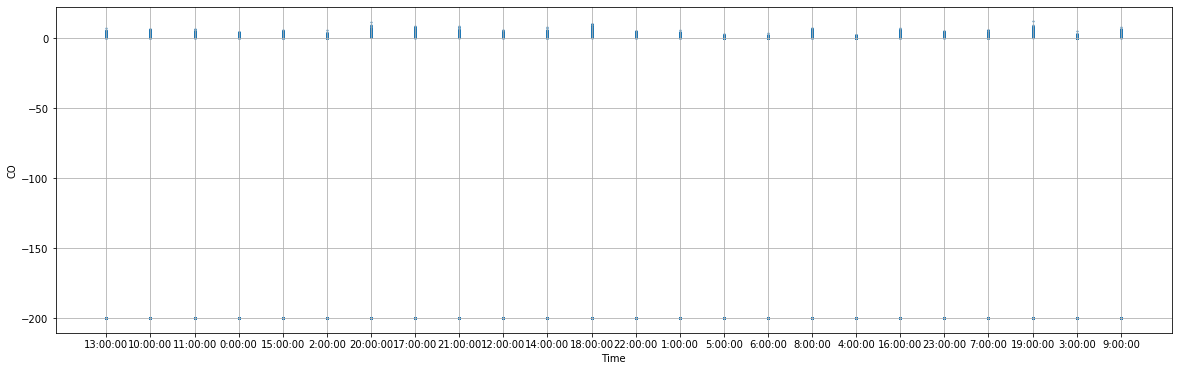

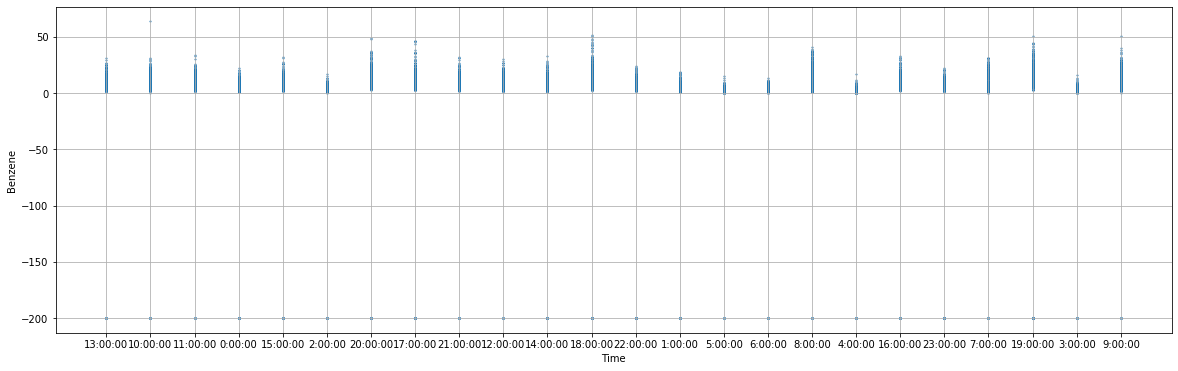

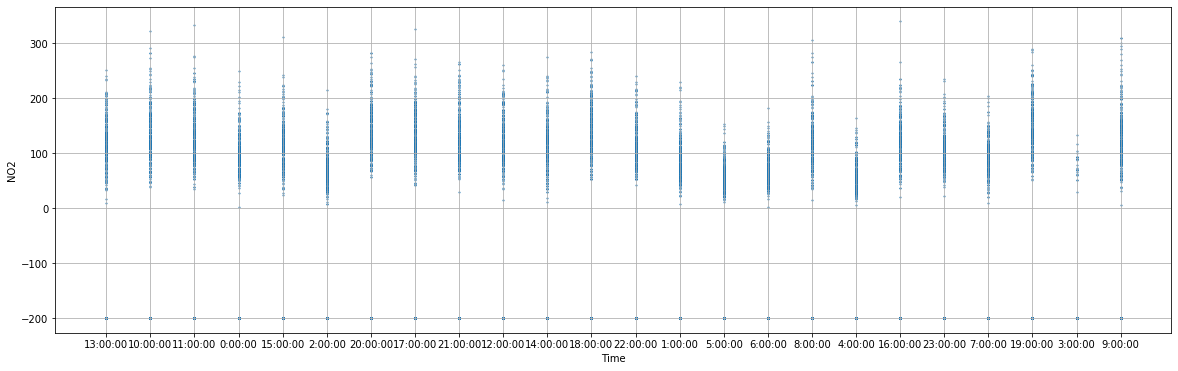

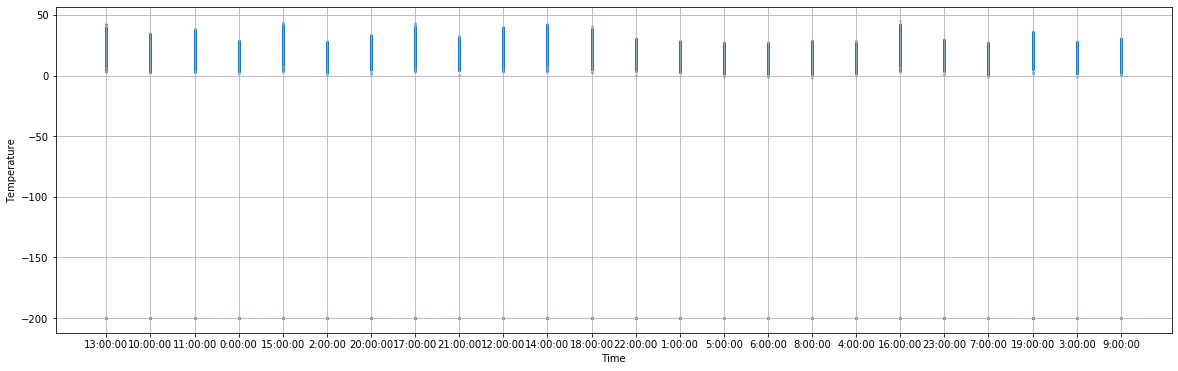

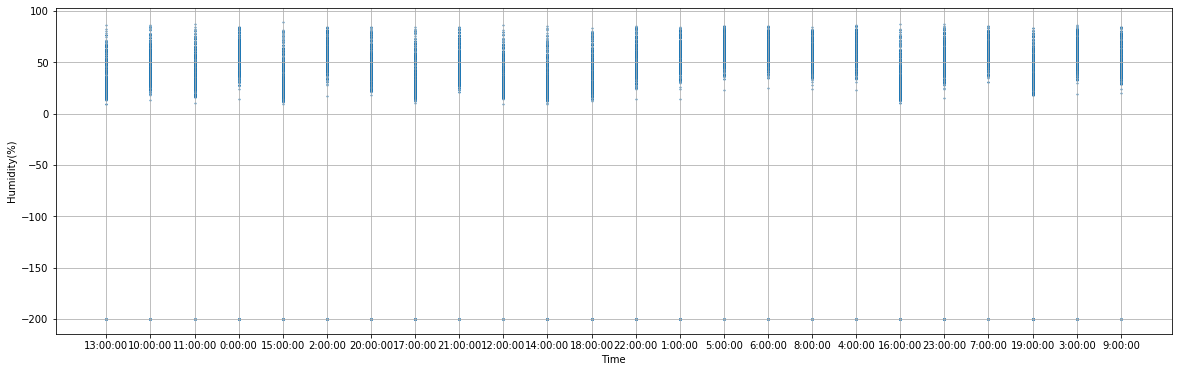

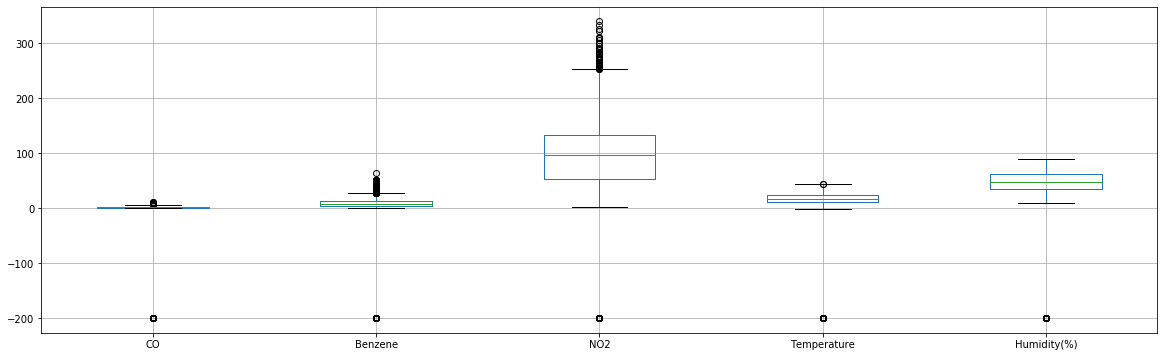

In [6]:
#your code

col_numerical = ['CO', 'Benzene', 'NO2', 'Temperature', 'Humidity(%)']

for col in col_numerical:
    plt.figure(figsize=(20, 6))
    plt.scatter(df_air_copy['Time'],df_air_copy[col], s=1.0)
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


plt.figure(figsize=(20, 6))
df_air.boxplot(column=col_numerical)

Explanation: <br>
in each feature, they all have the same value -200 that is implausible data and clear to be outliers.

(d) We need to handle any implausible or missing data. In the lecture, several strategies to do so have been 
introduced, for example, deleting data rows that contain missing/implausible values or replacing them by a value 
derived from other data points. 

In this question, consider implausible values to be the ones identified in question (c)
 
    1) For all numerical features, compute and show mean, standard deviation, minimum and maximum,
    while ignoring the missing and implausible values. Also, print the total number of data rows.
    
    2) Choose a strategy (or combination of strategies) to handle missing/implausible values. Create a cleaned data 
    set with all those values handled accordingly.
    
    3) For all numerical features, compute and show mean, standard deviation, minimum and maximum with respect to 
    your cleaned data set. Also print the total number of data rows.
    
    4) Motivate and explain your strategy and describe its (dis-)advantages compared to other options. Compare the 
    computed statistical values before and after cleaning and briefly describe and evaluate any changes.

In [7]:
#your code

col_numerical = ['CO', 'Benzene', 'NO2', 'Temperature', 'Humidity(%)']

# before clean
print("###--- Before Cleaning ---###\n")
for col in col_numerical:
    print("Column Name = {}".format(col))
    print("mean =",np.mean(df_air[col]))
    print("standard deviation =",np.std(df_air[col]))
    print("minimum =",np.min(df_air[col]))
    print("maximum =",np.max(df_air[col]))
    print("---------------------------------------")
    print()

print("the total number of data rows =", df_air.shape[0])
print()

# clean strategy
print("###--- Cleaning Strategy ---###\n")
df_air_cleaned = df_air
# df_air_cleaned = df_air_cleaned[df_air_cleaned[]]
print("1. Checking null value in dataset\n")
print(df_air_cleaned.isnull().sum().sort_values(ascending=False))
print()

print("2. Deleting data rows that contain implausible values\n")
for col in col_numerical:
    df_air_cleaned = df_air_cleaned[df_air_cleaned[col] != -200]
    print("Column Name = '{}' and the number of residual rows = {}".format(col,df_air_cleaned.shape[0]))
    print()

    
# after clean
print("###--- After Cleaning ---###\n")
for col in col_numerical:
    print("Column Name = {}".format(col))
    print("mean =",np.mean(df_air_cleaned[col]))
    print("standard deviation =",np.std(df_air_cleaned[col]))
    print("minimum =",np.min(df_air_cleaned[col]))
    print("maximum =",np.max(df_air_cleaned[col]))
    print("---------------------------------------")
    print()

print("the total number of data rows =", df_air_cleaned.shape[0])

###--- Before Cleaning ---###

Column Name = CO
mean = -34.69576059850374
standard deviation = 78.05778465951362
minimum = -200.0
maximum = 11.9
---------------------------------------

Column Name = Benzene
mean = 1.706768792304952
standard deviation = 41.69531355924269
minimum = -200.0
maximum = 63.7
---------------------------------------

Column Name = NO2
mean = 57.571666072912954
standard deviation = 127.45881932367406
minimum = -200
maximum = 340
---------------------------------------

Column Name = Temperature
mean = 9.645398408740055
standard deviation = 43.537143848132196
minimum = -200.0
maximum = 44.6
---------------------------------------

Column Name = Humidity(%)
mean = 39.32929580809879
standard deviation = 51.57985891518149
minimum = -200.0
maximum = 88.7
---------------------------------------

the total number of data rows = 8421

###--- Cleaning Strategy ---###

1. Checking null value in dataset

Datetime       0
Humidity(%)    0
Temperature    0
NO2            0


Explanation: <br>
1. Strategy: Deleting data rows that contain implausible values.

2. Advantages: For replacing implausible values by a value derived from other data points, the replaced value may be incorrect and the dataset may be biased so that the dataset may be not reliable. Deleting data strategy can avoid this error.

3. Disadvantages: if we simple delte the wohle raw that contain any implausible values recursively, some important value may alos be deleted, if we delete only the cell that contains the implausible values, it will cause that different feature will have different feature size, it may cause problem for further analysis..

4. Compare: the mean values are more bigger after cleaning without the effect of implausible negative value -200, 
standard deviation is more smaller without those outliers, the dataset is more stable. The minimum of each feature are 
different now, making the minimun also meaningful for analysis. totally the result of cleaned dataset is more accurate.

## Question 2 - Data Preprocessing  and Advanced Visualization (15 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv').

(a) To create a suitable input for the following questions, modify the data set as listed below and then print the first 5 data rows:

    - Remove the columns 'Traffic_Volume' and 'Particulate_Matter'
    - Replace the columns 'Date' and 'Time' by a combined column 'Datetime' using the datetime data type
    - Restrict the data to the timeframe between 2004-04-01 and 2005-03-31
    - Drop all rows that contain a missing value or a value below -37
    
*Hint: You may be able to reuse some of your code or data sets created above.*

In [8]:
#your code
df_air = pd.read_csv("air_pollution_2.csv", delimiter=',')
df_air = df_air.drop(columns = ['Traffic_Volume','Particulate_Matter'])
df_air['Datetime'] = pd.to_datetime(df_air.Date)+pd.to_timedelta(df_air.Time, unit='h')
df_air = df_air.drop(columns=['Date','Time'])
df_air = df_air[(df_air['Datetime'] >= '2004-04-01') & (df_air['Datetime'] <= '2005-03-31')]
df_air = df_air.dropna(how='any',axis=0)
col_numerical = ['CO', 'Benzene', 'NO2', 'Temperature', 'Humidity(%)']
for col in col_numerical:
    df_air = df_air[df_air[col] >= -37]
df_air.head()

,CO,Benzene,NO2,Temperature,Humidity(%),Datetime
0,4.7,25.8,182,14.0,53.0,2004-12-14 13:00:00
2,0.9,3.6,66,27.6,43.7,2004-07-25 11:00:00
4,3.0,10.3,113,10.2,78.4,2004-11-29 00:00:00
6,2.0,11.3,208,32.6,31.8,2004-09-13 15:00:00
9,0.9,7.4,97,31.6,23.8,2004-07-18 10:00:00


(b) For temperature, humidity and CO compute the mean value for each month. Create two stream graphs based on this newly computed data, that visualize the change in temperature, CO and humidity over the months:

    1) For the first stream graph, simply use the mean values you computed for each month.
    
    2) For the second stream graph, first normalize the computed mean values by mapping them individually to an interval between 0 and 1, that is, apply Min-max normalization.

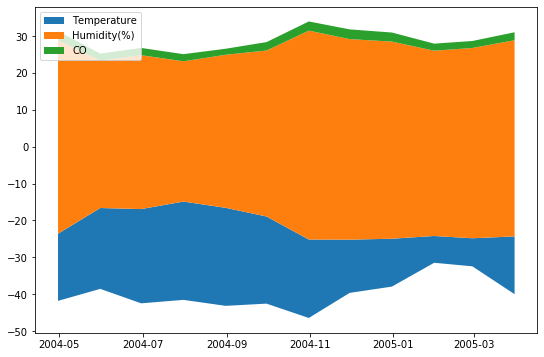

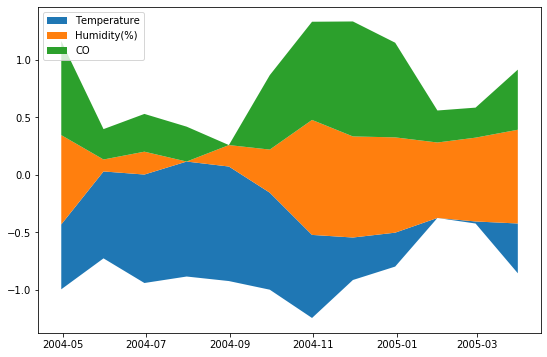

In [9]:
#your code

from sklearn import preprocessing
import copy

# ***--- Q1 ---***
df_air_month = copy.deepcopy(df_air)
df_air_month.set_index('Datetime',inplace=True)
monthly_avg = df_air_month.resample('M').mean()
# print(monthly_avg)

labels = ["Temperature", "Humidity(%)", "CO"]

fig, ax = plt.subplots(figsize=(9, 6))
ax.stackplot(monthly_avg.index, monthly_avg['Temperature'], monthly_avg['Humidity(%)'], monthly_avg['CO'], labels=labels, baseline='wiggle')
ax.legend(loc='upper left')
plt.show()

# ***--- Q2 ---***
min_max_scaler = preprocessing.MinMaxScaler((0,1))
min_max_scaler.fit(monthly_avg)
transformed_data = min_max_scaler.transform(monthly_avg)

fig, ax = plt.subplots(figsize=(9, 6))
ax.stackplot(monthly_avg.index, transformed_data[:,3], transformed_data[:,4], transformed_data[:,0], labels=labels, baseline='wiggle')
ax.legend(loc='upper left')
plt.show()


(c) Answer the following questions based on the stream graphs created in question 2(a) and briefly explain how you derived the answer. Which of the two stream graphs do you consider more adequate to obtain the answers?

    1) In which month is the average CO lowest?
    
    2) Is there any correlation between humidity and CO?
    
    3) Between which months is temperature increasing?

Explanation:<br>
1) The average CO in 2004-08 is lowest. Stream graph 2 is better. Because the under line of CO (green area) in 2004-08 is lowest.<br>
2) Yes. Stream graph 2 is better. Because the rise and fall of Humidity and CO are roughly the same.<br>
3) From 2004-04 to 2004-08. Stream graph 2 is better. Because the area of blue rrom 2004-04 to 2004-08 is increasing.<br>

(d) We want to create a heat map that visualizes the CO measured for different combinations of humidity and temperature. 
The heatmap should have 12 columns and 12 rows. The shown CO value should be the *median* of all values for the combination of humidity and temperature.

Modify the data as needed. Use a binning strategy of your choice for converting numerical data to categorical data. Motivate and explain all your choices and modifications.

In [10]:
#your code

df_air_month = copy.deepcopy(df_air)
df_air_month.set_index('Datetime',inplace=True)
monthly_med = df_air_month.resample('M').median()
pt = monthly_med.pivot("Temperature", "Humidity(%)", "CO")
monthly_med

,CO,Benzene,NO2,Temperature,Humidity(%)
Datetime,,,,,
2004-04-30,2.20,9.90,96.5,17.30,51.65
2004-05-31,1.70,9.25,96.0,20.70,38.30
2004-06-30,1.80,10.00,98.0,24.60,41.80
2004-07-31,1.80,10.20,98.0,26.40,38.00
2004-08-31,1.40,6.50,75.0,27.00,41.40
2004-09-30,1.90,10.20,102.0,23.00,45.80
2004-10-31,2.20,10.95,95.0,21.00,61.40
2004-11-30,2.20,9.70,119.5,13.25,56.80
2004-12-31,2.10,8.35,116.0,11.45,55.90


(e) Use the modified data to create a heat map as specified in question part (c). Answer the following questions based on that heat map and briefly explain how you derived your answer:

    1) For which combination of humidity and temperature values is the median CO highest? 
    
    2) How do you explain empty fields in your heat map?
    
    3) Is CO correlating with temperature, humidity, or both?

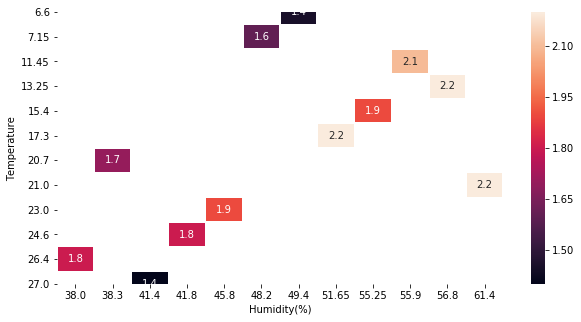

In [11]:
#your code
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(pt, annot=True, linewidths=.5, ax=ax)

Explanation:<br>
1)The higest median value of CO is 2.2, and I find tree combination group of humidity and temperature values about this higest median value.<br>
Temperature:17.3	  Humidity:51.65 <br>
Temperature:13.25	  Humidity:56.8 <br>
Temperature:21	      Humidity:61.4 <br>
2) Empty fields means three are no related value of determinated humidity and temperature values in the dataset.<br>
3) Both. When both temperature and humidity are relatively high, the value of CO is also high.<br>
   

## Question 3 - Clustering (15 points): 

(a) For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'). Use a scatter diagram to find the relation between the 'Traffic_Volume' and 'Particulate_Matter' columns.

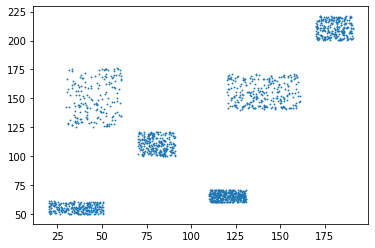

In [12]:
# Your code
df_air = pd.read_csv("air_pollution_2.csv", delimiter=',')
df_air_tp = pd.DataFrame(df_air, columns=["Traffic_Volume", "Particulate_Matter"])
# sns.jointplot(x="Traffic_Volume", y="Particulate_Matter", data=df_air_tp, kind="scatter");
plt.scatter(df_air_tp['Traffic_Volume'],df_air_tp['Particulate_Matter'], s=0.7)
plt.show()

(b) From the previous question you found the relationship between two columns which are suitable for applying clustering methods. Find the two arrays corresponding to these to columns and drop nan values from them. Apply the k_means method for clustering the two mentioned columns. Use three different number of clusters for classifying.

In [13]:
df_air_tp = df_air_tp.dropna()
x = df_air_tp.to_numpy()

K-Means: The number of clusters is 5


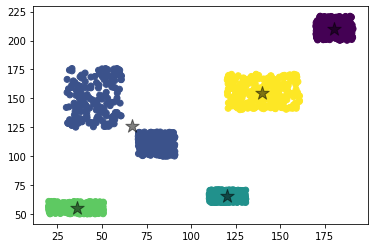

K-Means: The number of clusters is 6


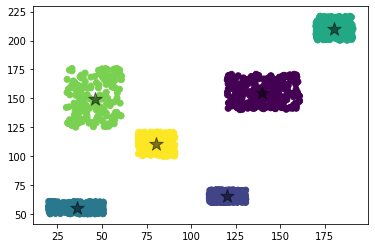

K-Means: The number of clusters is 7


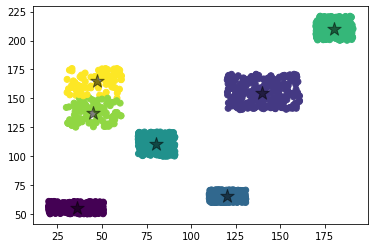

In [14]:
# Your code
# from sklearn import cluster
from sklearn.cluster import KMeans

def fun_KMeans(x,cluster_num):
    kmeans = KMeans(cluster_num).fit(x)
    Y = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    print("K-Means: The number of clusters is",cluster_num)
    plt.scatter(x[:, 0], x[:, 1], c=Y, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker = '*', s=200, alpha=0.5)
    plt.show()

for k in range(5,8):
    fun_KMeans(x,k)

(c) Apply the DBSCAN method for clustering the two mentioned columns. Use three different eps and min_samples for clustering.

DBSCAN: eps=4 , min_samples=20


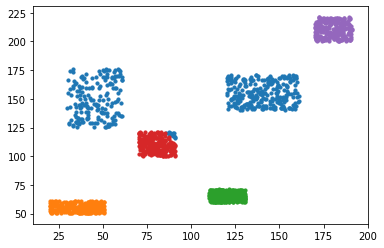

DBSCAN: eps=5 , min_samples=10


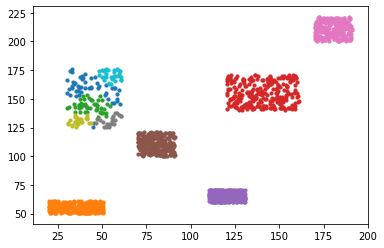

DBSCAN: eps=5 , min_samples=20


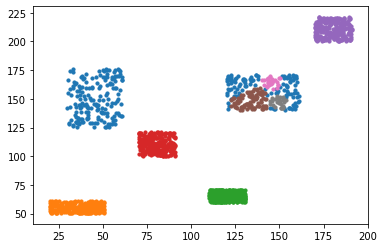

In [15]:
# Your code
from sklearn.cluster import DBSCAN
      
def fun_DBSCAN(x,eps,min_samples):
    dbscan = DBSCAN(eps, min_samples).fit(x)
    clusters = dbscan.labels_
    cluster_indexs = np.unique(clusters).tolist()
#     print(cluster_indexs)/
    
    print("DBSCAN: eps={} , min_samples={}".format(eps,min_samples))
    fig, plots = plt.subplots()
    for cluster_index in cluster_indexs :
        sub_set = np.array([x[i] for i in range(len(x)) if clusters[i] == cluster_index])
        if len(sub_set) == 0 :
            continue
        plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, cmap='viridis')
    plt.show()
    
choice = [[4,20],[5,10],[5,20]]
for [eps,min_samples] in choice:
    fun_DBSCAN(x,eps,min_samples)

(d) Compare k_means and DBSCAN results. Which of these methods is more suitable for clustering this data? Why?

K-Means: The number of clusters is 6


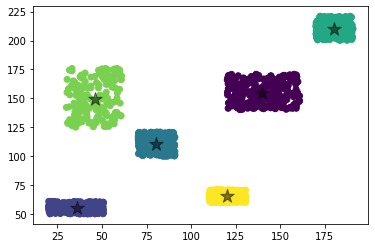

DBSCAN: eps=4 , min_samples=20


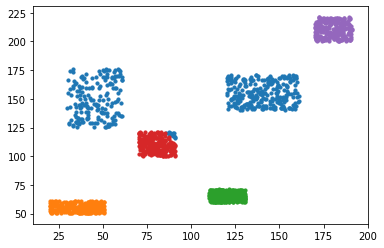

In [16]:
# Your code
fun_KMeans(x,cluster_num=6)
fun_DBSCAN(x,eps=4,min_samples=20)

Explanation:<br>
K-Means is more suitable for clustering this data, because we can intuitively distinguish that this data can be divided into 6 categories and each shape of clustering is rectangular.

(e) Add noise to the two mentioned columns. For adding noise, first find the range of these two columns and add a random number of 30 samples of noise in the range of each column to that. Plot the scatter diagram again.
Repeat k_means and DBSCAN algorithms for clustering. Which of these methods is more suitable for clustering this data? Why?

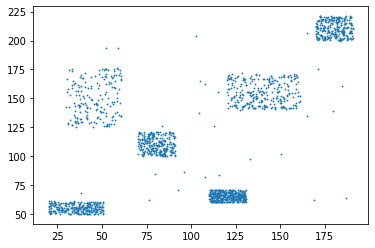

K-Means: The number of clusters is 6


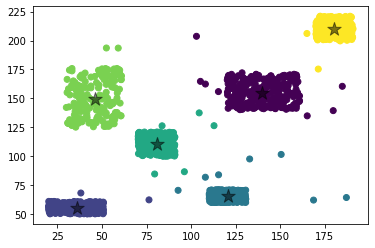

DBSCAN: eps=6 , min_samples=6


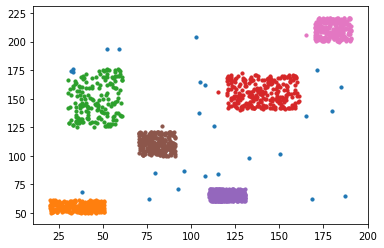

In [17]:
# Your code
def add_noise(x):
    min_0 = np.min(x[:,0])
    max_0 = np.max(x[:,0])
    min_1 = np.min(x[:,1])
    max_1 = np.max(x[:,1])

    noise = np.zeros((30,2,))

    for i in range(noise.shape[0]):
        rand_0 = min_0 + (max_0-min_0)*np.random.random()
        rand_1 = min_1 + (max_1-min_1)*np.random.random()
        noise[i,0] = rand_0
        noise[i,1] = rand_1
    x_noise = np.vstack((x,noise))
    return x_noise

x_noise = add_noise(x)
plt.scatter(x_noise[:,0],x_noise[:,1], s=0.7)
plt.show()

fun_KMeans(x_noise,cluster_num=6)
fun_DBSCAN(x_noise,eps=6,min_samples=6)

Explanation:<br>
DBSCAN is more suitable for clustering this data, because it can good distinguish noise to a cluster and other real data are also good clustered.

## Question 4 - Frequent itemsets and association rules (15 points): 

(a) You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'applications' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'applications_2.csv' dataset and use that for the next steps of the assignment.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [18]:
# Your code
data_app = pd.read_csv("applications.csv", delimiter=',')
df_app = pd.DataFrame(data_app).sample(frac=0.9, random_state=391180)
# df_app.to_csv("applications_2.csv", index=False)

C:\Users\unicorn\Anaconda3\envs\tm_env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(b) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm (Hint: When you are creating rows to make the data_set, you should use none_empty strings).

In [19]:
# Your code

# Import Apriori module and TransactionEncoder module and association module from mlxtend
import csv
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule

# Read file 'applications_2.csv' and change the data format for Apriori algorithm
data_set = []
with open("applications_2.csv") as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        data_set.append(row)
        
# Using TransactionEncoder module to convert an array to DataFrame for Apriori algorithm in mlxtend
te = TransactionEncoder()
te_ary = te.fit(data_set).transform(data_set)
data = pd.DataFrame(te_ary, columns = te.columns_)
# data.tail(5)

frequent_itemsets = apriori(data, min_support = 0.4, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets


,support,itemsets,length
0,0.999830,(),1
1,0.585753,(A_DECLINED),1
2,1.000000,(A_PARTLYSUBMITTED),1
3,0.558584,(A_PREACCEPTED),1
4,1.000000,(A_SUBMITTED),1
5,0.558584,(W_Completeren aanvraag),1
6,0.585753,"(, A_DECLINED)",2
7,0.999830,"(, A_PARTLYSUBMITTED)",2
8,0.558414,"(, A_PREACCEPTED)",2
9,0.999830,"(, A_SUBMITTED)",2


(c) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm having more than 2 members.

In [20]:
# Your code

frequent_itemsets_max_2 = apriori(data, min_support = 0.4, max_len = 2, use_colnames = True)

frequent_itemsets_min_2 = frequent_itemsets[~ frequent_itemsets['itemsets'].isin(frequent_itemsets_max_2['itemsets'])]
frequent_itemsets_min_2


,support,itemsets,length
19,0.585753,"(, A_PARTLYSUBMITTED, A_DECLINED)",3
20,0.585753,"(, A_SUBMITTED, A_DECLINED)",3
21,0.558414,"(, A_PREACCEPTED, A_PARTLYSUBMITTED)",3
22,0.999830,"(, A_SUBMITTED, A_PARTLYSUBMITTED)",3
23,0.558414,"(, A_PARTLYSUBMITTED, W_Completeren aanvraag)",3
24,0.558414,"(, A_PREACCEPTED, A_SUBMITTED)",3
25,0.558414,"(, A_PREACCEPTED, W_Completeren aanvraag)",3
26,0.558414,"(, A_SUBMITTED, W_Completeren aanvraag)",3
27,0.585753,"(A_SUBMITTED, A_DECLINED, A_PARTLYSUBMITTED)",3
28,0.558584,"(A_PREACCEPTED, A_SUBMITTED, A_PARTLYSUBMITTED)",3


(d) Find the itemsets having min_confidence=0.3 and min_lift=1.2. Print support, confidence and lift of filtered rules in one table.

In [21]:
# Your code

rules_association =arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.3)

filtered_rules = rules_association.loc[(rules_association['lift'] > 1.2)]

filtered_rules[['support', 'confidence', 'lift']]

,support,confidence,lift
22,0.558584,1.000000,1.790242
23,0.558584,1.000000,1.790242
62,0.558414,1.000000,1.790242
63,0.558414,1.000000,1.790242
66,0.558414,0.999696,1.790242
67,0.558414,0.999696,1.790242
86,0.558584,1.000000,1.790242
88,0.558584,1.000000,1.790242
89,0.558584,1.000000,1.790242
91,0.558584,1.000000,1.790242


## Question 5 - Text Mining (15 points)

Among the datasets given for this assignment you will find the files "pg_train" and "pg_test". These two files contain a labeled corpus, already splitted in training and test set.
The corpus consists of sentences from several novels, labeled with the name of the author. The first task is text classification: you will train a set of classifiers that predict the author of a piece of text.

(a) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a <font color=red>binary document-term matrix</font>; train a <font color=red >logistic classifier</font> with the author as target.

In [22]:
## preprocessing data 
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer, PorterStemmer

def preprocessData(sentence):
    # lower case all the words
    low_sen = sentence.lower()
    # remove punctuation
    translator = str.maketrans(dict.fromkeys(string.punctuation))
    wopunct_sen = low_sen.translate(translator)
    # tokenization 
    tokens = word_tokenize(wopunct_sen)
    # remove stop_words
    stop_words = set(stopwords.words('english'))
    wostop_tokens = [w for w in tokens if not w in stop_words] 
    # stemming)
    stemming = []
    snowball_stemmer = SnowballStemmer('english', ignore_stopwords=True)
    for token in wostop_tokens:
        stemming.append(snowball_stemmer.stem(token))
    stemmed_tokens = stemming
    # join all tokens together
    preprocessed_data = ' '.join(stemmed_tokens)
    return preprocessed_data


In [23]:
# read data and show difference between orinial and preprocessed one
import pandas as pd
train_data = pd.read_csv("pg_train.csv", delimiter="#", header=None, index_col=False,  encoding='latin-1', names = ['author','original_text'])
train_data["preprocessed_text"] = train_data.apply(lambda row: preprocessData(row.original_text), axis = 1)
display(train_data.head())

,author,original_text,preprocessed_text
0,austen,[ Emma by Jane Austen 1816 ] VOLUME I CHAPTER ...,emma jane austen 1816 volum chapter emma woodh...
1,austen,Sixteen years had Miss Taylor been in Mr . Woo...,sixteen year miss taylor mr woodhous famili le...
2,austen,It was Miss Taylor ' s loss which first brough...,miss taylor loss first brought grief wed day b...
3,austen,The want of Miss Taylor would be felt every ho...,want miss taylor would felt everi hour everi d...
4,austen,"He could not meet her in conversation , ration...",could meet convers ration play evil actual dis...


In [24]:
# build binary document term matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(binary=True)
X_train_binary = count_vect.fit_transform(train_data.preprocessed_text)
binary_dt_matrix = pd.DataFrame(X_train_binary.toarray(), columns=count_vect.get_feature_names())
print(binary_dt_matrix)
binary_dt_matrix.to_csv('binary document term matrix.csv')


# print(vectorizer.vocabulary_) 


      000  10  11  119  12  13  1350  14  15  1599  ...  zeal  zealous  zem  \
0       0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
1       0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
2       0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
3       0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
4       0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
...   ...  ..  ..  ...  ..  ..   ...  ..  ..   ...  ...   ...      ...  ...   
4494    0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
4495    0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
4496    0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
4497    0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
4498    0   0   0    0   0   0     0   0   0     0  ...     0        0    0   

      zigzag  zmite  zoetrop  zola  zoolog  zso  zu

In [25]:
# Training a logistic classifier based on the binary document term matrix
from sklearn.linear_model import LogisticRegression

logReg_binary = LogisticRegression(solver='saga', multi_class='auto')
logReg_binary.fit(X_train_binary, train_data.author)
print("Score of model 1 on training data:", logReg_binary.score(X_train_binary, train_data.author))


Score of model 1 on training data: 1.0


C:\Users\unicorn\Anaconda3\envs\tm_env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


(b) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a <font color=red>document-term matrix of counts</font>; train a <font color=red>logistic classifier</font> with the author as target.


In [26]:
# build document term count matrix

count_vec = CountVectorizer()
X_train_count = count_vec.fit_transform(train_data.preprocessed_text)
count_dt_matrix = pd.DataFrame(X_train_count.toarray(), columns=count_vec.get_feature_names())

print(count_dt_matrix)
count_dt_matrix.to_csv('count document term matrix.csv')

      000  10  11  119  12  13  1350  14  15  1599  ...  zeal  zealous  zem  \
0       0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
1       0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
2       0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
3       0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
4       0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
...   ...  ..  ..  ...  ..  ..   ...  ..  ..   ...  ...   ...      ...  ...   
4494    0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
4495    0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
4496    0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
4497    0   0   0    0   0   0     0   0   0     0  ...     0        0    0   
4498    0   0   0    0   0   0     0   0   0     0  ...     0        0    0   

      zigzag  zmite  zoetrop  zola  zoolog  zso  zu

In [27]:
# Training a logistic classifier based on the count document term matrix
from sklearn.linear_model import LogisticRegression

logReg_count = LogisticRegression(solver='saga', multi_class='auto')
logReg_count.fit(X_train_count, train_data.author)
print("Score based on count document term matrix on training data:", logReg_binary.score(X_train_count, train_data.author))


Score based on count document term matrix on training data: 0.9997777283840854


C:\Users\unicorn\Anaconda3\envs\tm_env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


(c) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a <font color=red>tf-idf scores document-term matrix</font>; train a <font color=red>logistic classifier</font>.


In [28]:
# tf-idf scores document term matrix
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)
# print(X_train_tfidf)
tfdf_dt_matrix = pd.DataFrame(X_train_tfidf.toarray())
print(tfdf_dt_matrix)
count_dt_matrix.to_csv('tf-idf scores document term matrix.csv')

      0      1      2      3      4      5      6      7      8      9      \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4494    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4495    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4496    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4497    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4498    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  11493  11494  11495  11496  11497  11498  11499  115

In [29]:
# based on tf-idf document-term matrix
logReg_tfidf = LogisticRegression(solver='saga', multi_class='auto')
logReg_tfidf.fit(X_train_tfidf,train_data.author)
print("Score based on tf_idf matrix on training data:", logReg_tfidf.score(X_train_tfidf, train_data.author))

Score based on tf_idf matrix on training data: 0.9993331851522561


(d) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a <font color=red>doc2vec embedding</font> in order to reduce the dimension of the document vector to <font color=red>300</font>; use the <font color=red>doc2vec model</font> you just trained to convert the training set to a set of document vectors; train a logistic classifier with the author as target.


In [30]:
from gensim.models.doc2vec import TaggedDocument

documents_tagged=[TaggedDocument(doc.split(' '), train_data.author[i].split()) for i, doc in enumerate(train_data.preprocessed_text)]
# print(documents_tagged)

[TaggedDocument(words=['emma', 'jane', 'austen', '1816', 'volum', 'chapter', 'emma', 'woodhous', 'handsom', 'clever', 'rich', 'comfort', 'home', 'happi', 'disposit', 'seem', 'unit', 'best', 'bless', 'exist', 'live', 'near', 'twenti', 'one', 'year', 'world', 'littl', 'distress', 'vex', 'youngest', 'two', 'daughter', 'affection', 'indulg', 'father', 'consequ', 'sister', 'marriag', 'mistress', 'hous', 'earli', 'period', 'mother', 'die', 'long', 'ago', 'indistinct', 'remembr', 'caress', 'place', 'suppli', 'excel', 'woman', 'gover', 'fallen', 'littl', 'short', 'mother', 'affect'], tags=['austen']), TaggedDocument(words=['sixteen', 'year', 'miss', 'taylor', 'mr', 'woodhous', 'famili', 'less', 'gover', 'friend', 'fond', 'daughter', 'particular', 'emma', 'intimaci', 'sister', 'even', 'miss', 'taylor', 'ceas', 'hold', 'nomin', 'offic', 'gover', 'mild', 'temper', 'hard', 'allow', 'impos', 'restraint', 'shadow', 'author', 'long', 'pass', 'away', 'live', 'togeth', 'friend', 'friend', 'mutual', 'at

In [31]:
import multiprocessing
from tqdm import tqdm
from sklearn import utils
from gensim.models.doc2vec import Doc2Vec

cores = multiprocessing.cpu_count()

#doc2vec_model with dim 300
doc2vec_model = Doc2Vec(dm=0, vector_size=300, workers=cores)
doc2vec_model.build_vocab([x for x in tqdm(documents_tagged)])

# Training the doc2vec model
for epoch in range(30):
    doc2vec_model.train(utils.shuffle([x for x in tqdm(documents_tagged)]), total_examples=len(documents_tagged), epochs=1)
    doc2vec_model.alpha -= 0.002
    doc2vec_model.min_alpha = doc2vec_model.alpha

100%|████████████████████████████████████████████| 4499/4499 [00:00<00:00, 2252348.26it/s]


In [32]:

from sklearn.linear_model import LogisticRegression

# Building the feature vector for the classifier
def vec_for_learning(model, docs):
    doc2vec_vectors = [model.infer_vector(doc.words) for doc in docs]
    targets = [doc.tags for doc in docs]
    return doc2vec_vectors, targets

# Translating docs into vectors for training  set
X_train_doc2vec, y_train_doc2vec = vec_for_learning(doc2vec_model, documents_tagged)

# Training a classification model
logReg_doc2vec = LogisticRegression(solver='saga',multi_class='auto')
logReg_doc2vec.fit(X_train_doc2vec,y_train_doc2vec)
print("Score of classification model based on word2vec on training data:", logReg_doc2vec.score(X_train_doc2vec, y_train_doc2vec))

C:\Users\unicorn\Anaconda3\envs\tm_env\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score of classification model based on word2vec on training data: 0.632807290509002


C:\Users\unicorn\Anaconda3\envs\tm_env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


(e) Predict the classification with the four models on the test data.

In [33]:
# read data
test_data = pd.read_csv("pg_test.csv", delimiter="#", header=None, index_col=False,  encoding='latin-1', names = ['author','original_text'])
test_data["preprocessed_text"] = test_data.apply(lambda row: preprocessData(row.original_text), axis = 1)
display(test_data.head())

# transfer data
# test data of model based on binaray matrix
count_vect_test = CountVectorizer(binary=True,vocabulary=count_vect.vocabulary_)
X_test_binary = count_vect_test.fit_transform(test_data.preprocessed_text)

# test data of model based on count matrix
count_vect_test = CountVectorizer(vocabulary=count_vect.vocabulary_)
X_test_count = count_vect_test.fit_transform(test_data.preprocessed_text)

# test data of model based on tf-idf matrix
X_test_tfidf = tfidf_transformer.fit_transform(X_test_count)

# test data of model based on doc2vec
documents_tagged=[TaggedDocument(doc.split(' '), test_data.author[i]) for i, doc in enumerate(test_data.preprocessed_text)]
X_test_doc2vec, y_test_doc2vec = vec_for_learning(doc2vec_model, documents_tagged)
                                

,author,original_text,preprocessed_text
0,austen,When you are tired of eating strawberries in t...,tire eat strawberri garden shall cold meat hou...
1,austen,""" I will answer for it , that mine thinks hers...",answer mine think full clever would spurn bodi...
2,austen,"Donwell Lane is never dusty , and now it is pe...",donwel lane never dusti perfect dri come donke...
3,austen,"Under that peculiar sort of dry , blunt manner...",peculiar sort dri blunt manner know warmest he...
4,austen,No lurking horrors were to upbraid him for his...,lurk horror upbraid easi credul consent donwel...


In [34]:
# make prediction
y_pred_binary = logReg_binary.predict(X_test_binary)
y_pred_count = logReg_count.predict(X_test_count)
y_pred_tfidf = logReg_tfidf.predict(X_test_tfidf)
y_pred_doc2vec = logReg_doc2vec.predict(X_test_doc2vec)

print(logReg_binary.score(X_test_binary, test_data.author))
print(logReg_count.score(X_test_count, test_data.author))
print(logReg_tfidf.score(X_test_tfidf, test_data.author))
print(logReg_doc2vec.score(X_test_doc2vec, y_test_doc2vec))

0.9827242524916944
0.9767441860465116
0.9867109634551495
0.6338870431893687


(f) Obtain confusion matrices for the four different models.


In [35]:
import numpy as np

cm_binary = pd.crosstab(np.array(test_data.author), np.array(y_pred_binary), rownames=['True'], colnames=['Predicted'], margins=True)
cm_count = pd.crosstab(np.array(test_data.author), np.array(y_pred_count), rownames=['True'], colnames=['Predicted'], margins=True)
cm_tfidf = pd.crosstab(np.array(test_data.author), np.array(y_pred_tfidf), rownames=['True'], colnames=['Predicted'], margins=True)
cm_doc2vec = pd.crosstab(np.array(y_test_doc2vec), np.array(y_pred_doc2vec), rownames=['True'], colnames=['Predicted'], margins=True)
display(cm_binary)
display(cm_count)
display(cm_tfidf)
display(cm_doc2vec)

Predicted,austen,chesterton,shakespeare,All
True,,,,
austen,681,6,2,689
chesterton,14,500,1,515
shakespeare,3,0,298,301
All,698,506,301,1505


Predicted,austen,chesterton,shakespeare,All
True,,,,
austen,679,8,2,689
chesterton,19,494,2,515
shakespeare,1,3,297,301
All,699,505,301,1505


Predicted,austen,chesterton,shakespeare,All
True,,,,
austen,681,8,0,689
chesterton,9,506,0,515
shakespeare,0,3,298,301
All,690,517,298,1505


Predicted,austen,chesterton,shakespeare,All
True,,,,
austen,502,137,50,689
chesterton,217,243,55,515
shakespeare,46,46,209,301
All,765,426,314,1505


(g) Obtain accuracy and f1-score for the four different models.


In [36]:
from sklearn.metrics import classification_report

print("F1-score and accuracy score of model based on binaray matrix:\n", classification_report(test_data.author,y_pred_binary))
print("F1-score and accuracy score of model based on count matrix:\n", classification_report(test_data.author,y_pred_count))
print("F1-score and accuracy score of model based on tfidf matrix:\n", classification_report(test_data.author,y_pred_tfidf))
print("F1-score and accuracy score of model based on doc2vec:\n", classification_report(y_test_doc2vec,y_pred_doc2vec))

F1-score and accuracy score of model based on binaray matrix:
               precision    recall  f1-score   support

      austen       0.98      0.99      0.98       689
  chesterton       0.99      0.97      0.98       515
 shakespeare       0.99      0.99      0.99       301

    accuracy                           0.98      1505
   macro avg       0.98      0.98      0.98      1505
weighted avg       0.98      0.98      0.98      1505

F1-score and accuracy score of model based on count matrix:
               precision    recall  f1-score   support

      austen       0.97      0.99      0.98       689
  chesterton       0.98      0.96      0.97       515
 shakespeare       0.99      0.99      0.99       301

    accuracy                           0.98      1505
   macro avg       0.98      0.98      0.98      1505
weighted avg       0.98      0.98      0.98      1505

F1-score and accuracy score of model based on tfidf matrix:
               precision    recall  f1-score   support

(h) Briefly comment on the quality of the predictions for the four models.

Explanation:
Models based on binary document-term matrix,counts document-term matrix, tf-idf scores document-term matrix perform well, they get high prediction score and get high reall, high accuracy, but doc2vec model's performance are much worser, perhaps because the limitation of the vector dimension.


(i) For the two authors <font color=red>Austen and Chesterton separately</font>, build a bigram language model. You should <font color=red>use both training and test data</font> to build the model. Do not perform stemming or stopword removal for this task, but do use the other preprocessing steps described in (a). <font color=red>Use both right and left padding</font>, and manage unknown terms by using a dedicated token.

In [37]:
# preprocess data 

# define function
def preprocessData(sentence):
    # lower case all the words
    low_sen = sentence.lower()
    # remove punctuation
    translator = str.maketrans(dict.fromkeys(string.punctuation))
    wopunct_sen = low_sen.translate(translator)
    # tokenization 
    tokens = word_tokenize(wopunct_sen)
    # join all tokens together
    preprocessed_data = ' '.join(tokens)
    return preprocessed_data

# read data and show difference between orinial and preprocessed one
import pandas as pd
# train_data = pd.read_csv("pg_train.csv", delimiter="#", header=None, index_col=False,  encoding='latin-1', names = ['author','original_text'])
train_data["preprocessed_text"] = train_data.apply(lambda row: preprocessData(row.original_text), axis = 1)
display(train_data.head())
# print(train_data.shape)

# test_data = pd.read_csv("pg_test.csv", delimiter="#", header=None, index_col=False,  encoding='latin-1', names = ['author','original_text'])
test_data["preprocessed_text"] = test_data.apply(lambda row: preprocessData(row.original_text), axis = 1)
display(test_data.head())
# print(test_data.shape)

# concatinate train and test set
concat_set = pd.concat([train_data, test_data], ignore_index=True, sort=False)
# print(result.shape)

,author,original_text,preprocessed_text
0,austen,[ Emma by Jane Austen 1816 ] VOLUME I CHAPTER ...,emma by jane austen 1816 volume i chapter i em...
1,austen,Sixteen years had Miss Taylor been in Mr . Woo...,sixteen years had miss taylor been in mr woodh...
2,austen,It was Miss Taylor ' s loss which first brough...,it was miss taylor s loss which first brought ...
3,austen,The want of Miss Taylor would be felt every ho...,the want of miss taylor would be felt every ho...
4,austen,"He could not meet her in conversation , ration...",he could not meet her in conversation rational...


,author,original_text,preprocessed_text
0,austen,When you are tired of eating strawberries in t...,when you are tired of eating strawberries in t...
1,austen,""" I will answer for it , that mine thinks hers...",i will answer for it that mine thinks herself ...
2,austen,"Donwell Lane is never dusty , and now it is pe...",donwell lane is never dusty and now it is perf...
3,austen,"Under that peculiar sort of dry , blunt manner...",under that peculiar sort of dry blunt manner i...
4,austen,No lurking horrors were to upbraid him for his...,no lurking horrors were to upbraid him for his...


In [38]:
# select data only with author Austen
austen_text = concat_set.loc[concat_set['author'] == 'austen'].preprocessed_text
display(austen_text.head())
# select data only with author Chesterton
chester_text = concat_set.loc[concat_set['author'] == 'chesterton'].preprocessed_text
display(chester_text.head())

austen_sents = [doc.split(' ') for  doc in austen_text]
chester_sents =  [doc.split(' ') for  doc in chester_text]

0    emma by jane austen 1816 volume i chapter i em...
1    sixteen years had miss taylor been in mr woodh...
2    it was miss taylor s loss which first brought ...
3    the want of miss taylor would be felt every ho...
4    he could not meet her in conversation rational...
Name: preprocessed_text, dtype: object

2062    the ball and the cross by g k chesterton 1909 ...
2063    every sort of tool or apparatus had in consequ...
2064    all these things as i say the professor had in...
2065    a monk of immense learning and acute intellect...
2066    it is folly to talk of this or that demonstrat...
Name: preprocessed_text, dtype: object

In [42]:
import nltk
from nltk import bigrams
from collections import Counter, defaultdict

def bigramModel(sents):
    # Create a placeholder for model
    model = defaultdict(lambda: defaultdict(lambda: 0))

    # Count frequency of co-occurance  
    for sentence in sents:
        for w1, w2 in bigrams(sentence, pad_right=True, pad_left=True):
            model[w1][w2] += 1

    # Transform the counts to probabilities
    for w1 in model:
        total_count = float(sum(model[w1].values()))
        for w2 in model[w1]:
            model[w1][w2] /= total_count
    return model

In [43]:
def mostFreqWord(w,model):
    x = dict(model[w])
    sorted_words = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
#     print(sorted_words)
    return list(sorted_words.keys())[0]

In [44]:
bigram_model =  bigramModel(austen_sents)
bigram_model['the']

defaultdict(<function __main__.bigramModel.<locals>.<lambda>.<locals>.<lambda>()>,
            {'best': 0.005776230416205096,
             'world': 0.015904415255578414,
             'youngest': 0.0007121379965184365,
             'two': 0.008150023737933217,
             'intimacy': 0.0005538851084032284,
             'nominal': 0.0001582528881152081,
             'mildness': 0.0001582528881152081,
             'shadow': 0.0001582528881152081,
             'real': 0.0013451495489792689,
             'power': 0.0022155404336129136,
             'disadvantages': 7.912644405760406e-05,
             'danger': 0.0011868966608640607,
             'shape': 0.0003165057762304162,
             'wedding': 0.0005538851084032284,
             'bride': 0.00023737933217281214,
             'event': 0.00253204620984333,
             'match': 0.001503402437094477,
             'want': 0.0009495173286912486,
             'kindness': 0.0010286437727488526,
             'affection': 0.000712137996518436

In [45]:
mostFreqWord('the',bigram_model)

'disadvantages'

(j) For each author, use the correspondent language models from (i) to generate, using MLE, a sentence of fifteen words starting from each of the following terms:

In [ ]:
'She'
'They'
'It'

In [49]:
# 'createSenctence' create a sentence where the next word is the word with highest probability of following the previous word. 
# You should continue until sentence length reaches 15.
def createSentence(s_word,model,length=15):
    sent = [s_word]
    for i in range(length - 1):
        nxt_word = mostFreqWord(sent[-1],model)
        sent.append(nxt_word)
    return sent



In [50]:
print("Sentences generated by the bigram-model:")
print('sentence starts with she:\n', createSentence('she',bigram_model,length=15))
print('sentence starts with they:\n',createSentence('they',bigram_model))
print('sentence starts with it:\n',createSentence('it',bigram_model))

Sentences generated by the bigram-model:
sentence starts with she:
 ['she', 'recalled', 'her', 'caresses', 'and', 'companion', 'such', 'thoughts', 'but', 'directed', 'chiefly', 'by', 'matrimony', 'being', 'never']
sentence starts with they:
 ['they', 'coming', 'directly', 'which', 'threatened', 'alloy', 'the', 'disadvantages', 'which', 'threatened', 'alloy', 'the', 'disadvantages', 'which', 'threatened']
sentence starts with it:
 ['it', 'take', 'pleasure', 'sir', 'it', 'take', 'pleasure', 'sir', 'it', 'take', 'pleasure', 'sir', 'it', 'take', 'pleasure']


(k) Now, computer another two models (for Austen and Chesterton separately), build a trigram model with the same data as in (i). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [51]:
from nltk import bigrams, trigrams
from collections import Counter, defaultdict

def trigramModel(sents):
    # Create a placeholder for model
    model = defaultdict(lambda: defaultdict(lambda: 0))

    # Count frequency of co-occurance  
    for sentence in austen_sents:
        for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
            model[(w1, w2)][w3] += 1

    # Transform the counts to probabilities
    for w1_w2 in model:
        total_count = float(sum(model[(w1,w2)].values()))
        for w3 in model[(w1,w2)]:
            model[(w1,w2)][w3] /= total_count
    return model

In [52]:
model = trigramModel(austen_sents)
model[('i','am')]

defaultdict(<function __main__.trigramModel.<locals>.<lambda>.<locals>.<lambda>()>,
            {'very': 45,
             'sure': 216,
             'afraid': 35,
             'sometimes': 1,
             'so': 22,
             'not': 57,
             'come': 3,
             'much': 9,
             'a': 10,
             'glad': 14,
             'rather': 6,
             'persuaded': 3,
             'right': 3,
             'secure': 1,
             'quite': 24,
             'never': 2,
             'going': 12,
             'inclined': 1,
             'far': 2,
             'convinced': 6,
             'well': 3,
             'of': 5,
             'in': 10,
             'to': 8,
             'and': 3,
             'but': 3,
             'sorry': 19,
             'most': 1,
             'grieved': 1,
             'as': 2,
             'still': 1,
             'ready': 4,
             'exceedingly': 2,
             'extremely': 6,
             'concerned': 1,
             'happy': 3,
    

In [53]:
mostFreqWord(('i','am'), model)

'sometimes'

(l) For each author, use the correspondent language models from (k) to generate, using MLE, a sentence of fifteen words starting from each of the same terms as question (j):

In [54]:
def createSentence(s_word,model,length=15):
    sent = [s_word]
    sent.append(mostFreqWord(s_word,bigram_model))
    for i in range(1,length - 1):
        nxt_word = mostFreqWord((sent[-2],sent[-1]),model)
        sent.append(nxt_word)
    return sent

In [55]:
# Your code
print("Sentences generated by the trigram-model:")
print('sentence starts with she:\n', createSentence('she',model))
print('sentence starts with they:\n',createSentence('they',model))
print('sentence starts with it:\n',createSentence('it',model))


Sentences generated by the trigram-model:
sentence starts with she:
 ['she', 'recalled', 'her', 'past', 'kindness', 'the', 'kindness', 'he', 'had', 'therefore', 'earnestly', 'tried', 'to', 'prevent', 'any']
sentence starts with they:
 ['they', 'coming', 'to', 'hartfield', 'the', 'longer', 'she', 'considered', 'that', 'mr', 'wingfield', 'in', 'town', 'or', 'among']
sentence starts with it:
 ['it', 'take', 'place', 'and', 'be', 'attacked', 'by', 'no', 'regrets', 'but', 'her', 'father', 'composed', 'himself', 'to']


(m) Comment on the quality of the models and generated text. Which model performs better? In general, which differences are there in using trigrams as opposed to bigrams?

Explanation:
From above generated sentences, we can see that the trigramm model perfrom slightly better than the bigram language model. when we use trigram, we should also back off to bigram.when some words are not come up in tripple, then we need to look up in bigrams.


## Question 6 - Process Mining (15 points)
For this part, refer to the online docs of pm4py (https://pm4py.fit.fraunhofer.de/).
Important: if you did not do it in the instruction, you should make sure to have the latest pm4py version: to get it is sufficient to type `pip install pm4py --upgrade`.
In this section of the assignment you will be working with a real life event log, derived from the activity of the help desk department of an Italian software company. The data is contained in the file "event_log.xes".

(a) Use the provided event log and identify the least frequent variant and the most frequent variant.


In [56]:
# Your code
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.log import case_statistics

log = xes_importer.import_log('event_log.xes')
variants = variants_filter.get_variants(log)

variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)

# print(variants_count)

most_count = variants_count[0]['count']
least_count = variants_count[-1]['count']
most_variants = []
least_variants = []

for item in variants_count:
    if item['count'] == most_count:
        most_variants.append(item)
    if item['count'] == least_count:
        least_variants.append(item)

print("The most frequent variant")
print(most_variants)
print()
print("The least frequent variant")
print(least_variants)


The most frequent variant
[{'variant': 'Assign seriousness,Take in charge ticket,Resolve ticket,Closed', 'count': 2366}]

The least frequent variant
[{'variant': 'Wait,Resolve ticket,Closed', 'count': 1}, {'variant': 'Take in charge ticket,Wait,Wait,Resolve ticket,Closed', 'count': 1}, {'variant': 'Take in charge ticket,Wait,Resolve ticket,Take in charge ticket,Wait,Resolve ticket,Closed', 'count': 1}, {'variant': 'Take in charge ticket,Take in charge ticket,Take in charge ticket,Resolve ticket,Closed', 'count': 1}, {'variant': 'Take in charge ticket,Take in charge ticket,Resolve ticket,Closed', 'count': 1}, {'variant': 'Take in charge ticket,Resolve ticket,Take in charge ticket,Wait,Take in charge ticket,Wait,Resolve ticket,Closed', 'count': 1}, {'variant': 'Take in charge ticket,Resolve ticket,Take in charge ticket,Wait,Take in charge ticket,Resolve ticket,Closed', 'count': 1}, {'variant': 'Take in charge ticket,Resolve ticket,Resolve ticket,Resolve ticket,Closed', 'count': 1}, {'var

(b) Remove all the variants that contain less than 1% of the traces in the log. Create a new event log without these variants.

In [57]:
# Your code
filter_variants = []
count_all_variants = len(log)
for item in variants_count:
    if item['count']/count_all_variants >= 0.01:
        filter_variants.append(item['variant'])

new_log = variants_filter.apply(log, filter_variants)
        
# print(new_log)

(c) Use Inductive miner algorithm to discover the process model based on you new event log (the filtered log without the infrequent variants of question (b)).


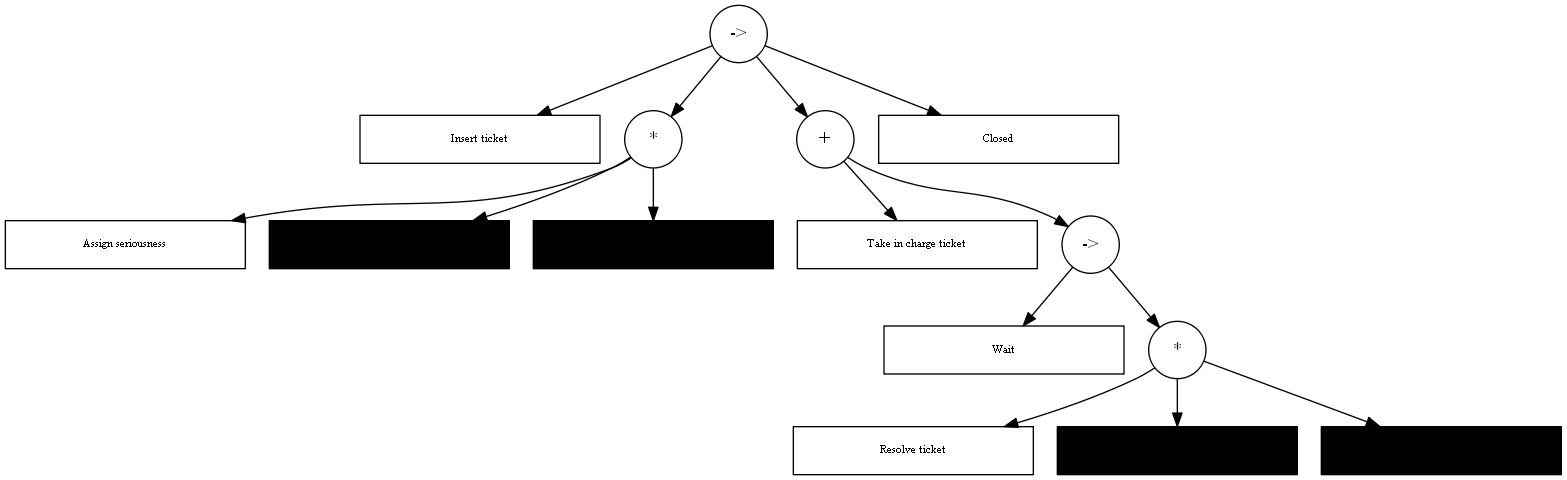

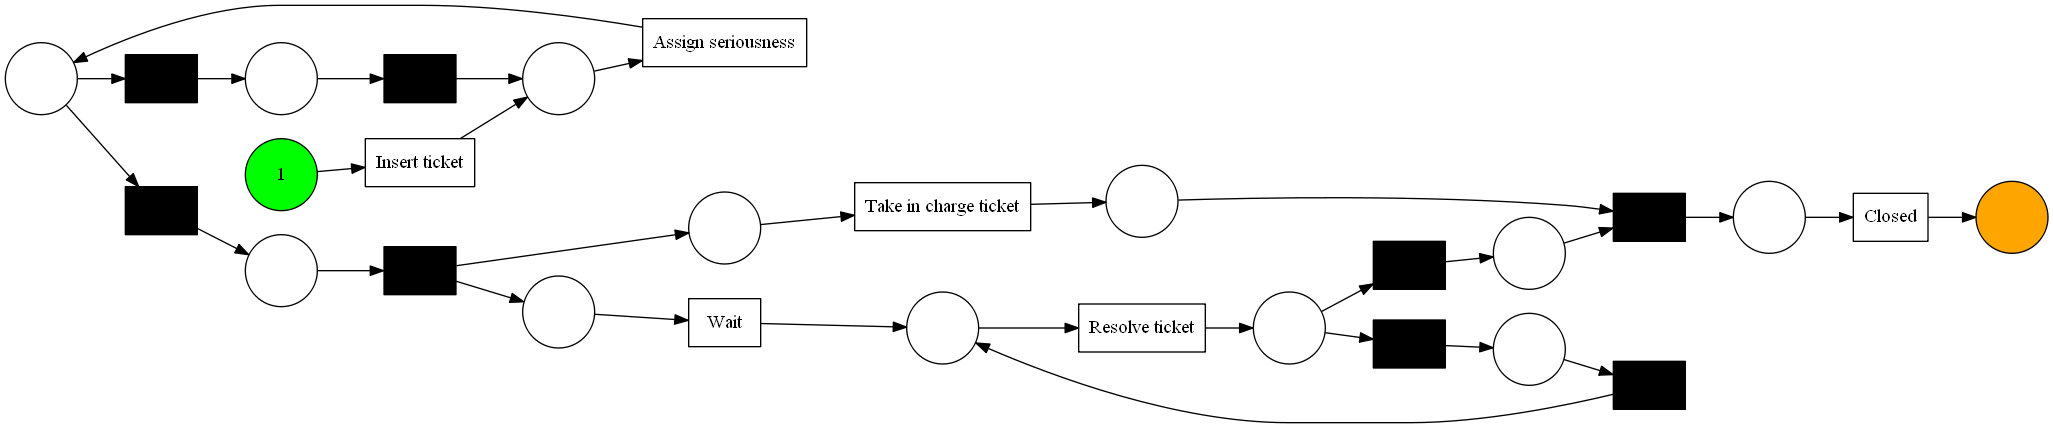

In [58]:
# Your code
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.visualization.process_tree import factory as pt_vis_factory
from pm4py.visualization.petrinet import factory as pn_vis_factory

tree = inductive_miner.apply_tree(new_log)
net, initial_marking, final_marking = inductive_miner.apply(new_log)

gviz_tree = pt_vis_factory.apply(tree)
pt_vis_factory.view(gviz_tree)

gviz_pn = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz_pn)

(d) Perform the token replay conformance checking using your discovered model (c) and the original event log. Does your process model fit the log?


In [59]:
# Your code
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay_factory

token_replay_result = token_based_replay_factory.apply(log, net, initial_marking, final_marking)

count = 0
for item in token_replay_result:
    if item['trace_is_fit'] == True:
        count = count + 1
print("True precent is", count/len(token_replay_result))

# print(token_replay_result)

True precent is 0.001091703056768559


Explanation:<br>
it does not fit the original event log at all


(e) Calculate the fitness of the model in (c).

In [60]:
# Your code
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

fitness_tokenbasedreplay = replay_fitness_factory.apply(log, net, initial_marking, final_marking)
print(fitness_tokenbasedreplay)

{'perc_fit_traces': 0.1091703056768559, 'average_trace_fitness': 0.6319639043028534, 'log_fitness': 0.6428389420857057}


(f) Are there any deviations between the process model and the event log? If so, where and why?

Explanation:
Yes, there are about 90.19% traces that don't fit to the process model，it must be some deviations between thoses traces and the process model.

(g) Now use the original event log and remove the two most frequent variants, and discover the model based on your new event log (the filtered log without two most frequent variants).


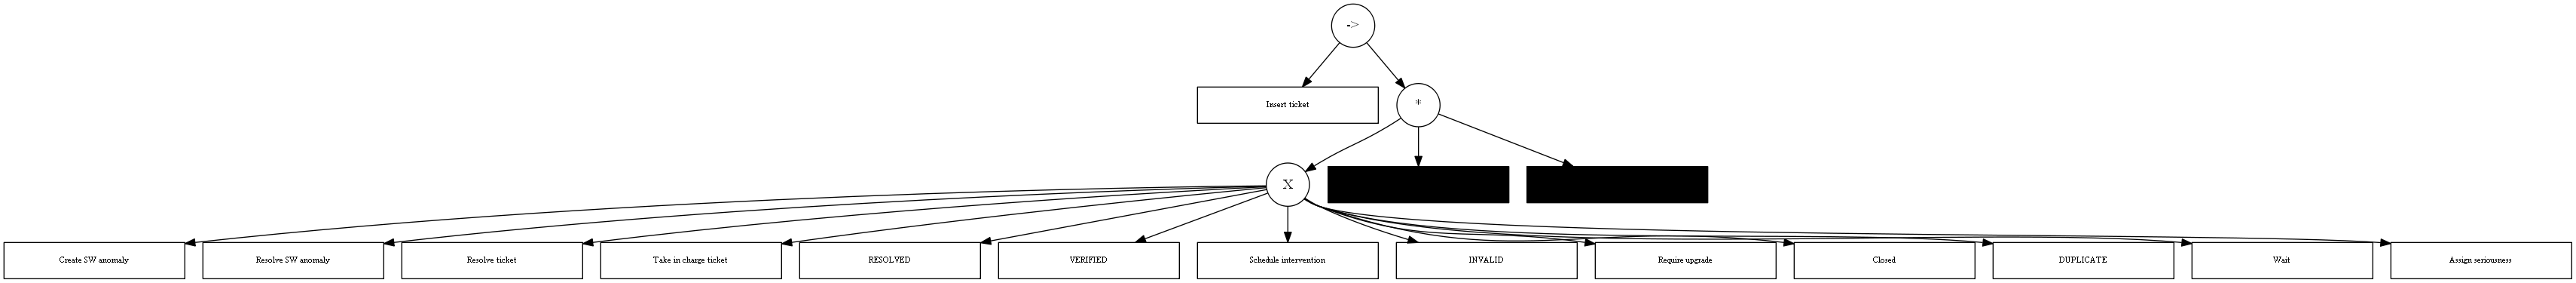

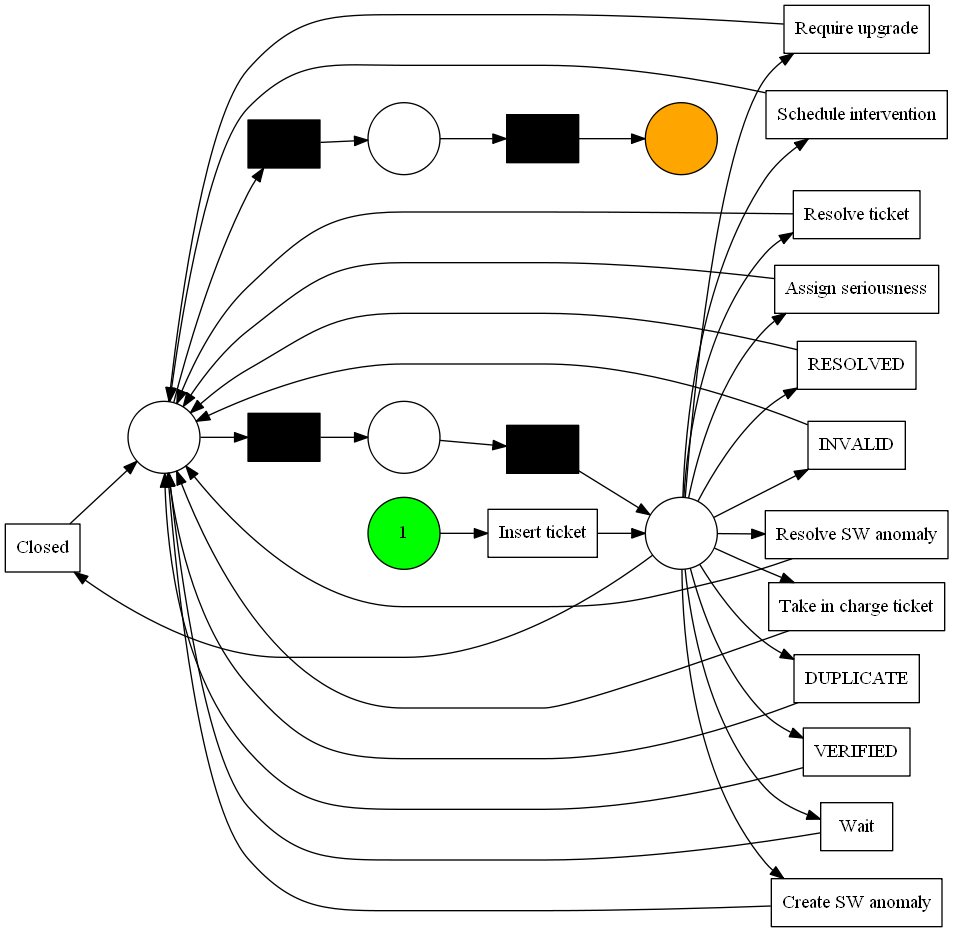

In [61]:
# Your code
variants_count_g = variants_count

for _ in range(2):
    most_count_g = variants_count_g[0]['count']
    for item in variants_count_g:
        if item['count'] == most_count_g:
            variants_count_g.remove(item)

# print(variants_count_g)

filter_variants_g = []
for item in variants_count_g:
    filter_variants_g.append(item['variant'])
    
new_log_g = variants_filter.apply(log, filter_variants_g)

tree_g = inductive_miner.apply_tree(new_log_g)
net_g, initial_marking_g, final_marking_g = inductive_miner.apply(new_log_g)

gviz_tree_g = pt_vis_factory.apply(tree_g)
pt_vis_factory.view(gviz_tree_g)

gviz_pn_g = pn_vis_factory.apply(net_g, initial_marking_g, final_marking_g)
pn_vis_factory.view(gviz_pn_g)

(h) Perform the token replay conformance checking using the newly discovered model of question (g) and the original event log. Does your process model fit the log?

In [62]:
# Your code
token_replay_result_g = token_based_replay_factory.apply(log, net_g, initial_marking_g, final_marking_g)

count = 0
for item in token_replay_result_g:
    if item['trace_is_fit'] == True:
        count = count + 1
print("True precent is", count/len(token_replay_result_g))

# print(token_replay_result_g)

True precent is 0.02576419213973799


Explanation:<br>
It donesn't fit the original event log, the percent fit traceks takes up only 2.58%

(i) Calculate the fitness of the model in (g).

In [63]:
# Your code
fitness_tokenbasedreplay_g = replay_fitness_factory.apply(log, net_g, initial_marking_g, final_marking_g)
print(fitness_tokenbasedreplay_g)

{'perc_fit_traces': 2.576419213973799, 'average_trace_fitness': 0.8213127317248899, 'log_fitness': 0.8279080530700401}


(j) Are there any deviations in the process model? If so, where and why?

Explanation:
Yes, most (97.42%) traces  don't fit to the process model. so there are some deviations between thoses traces and the process model.

(k) Use the complete event log (original event log) and discover your process model using Inductive Miner.


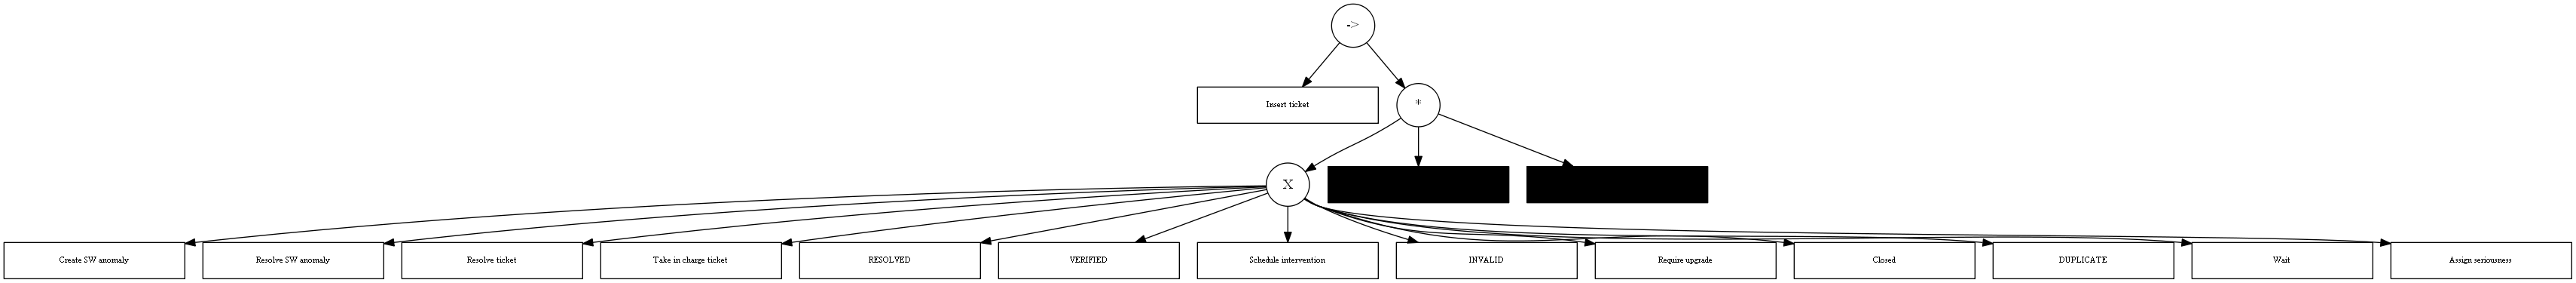

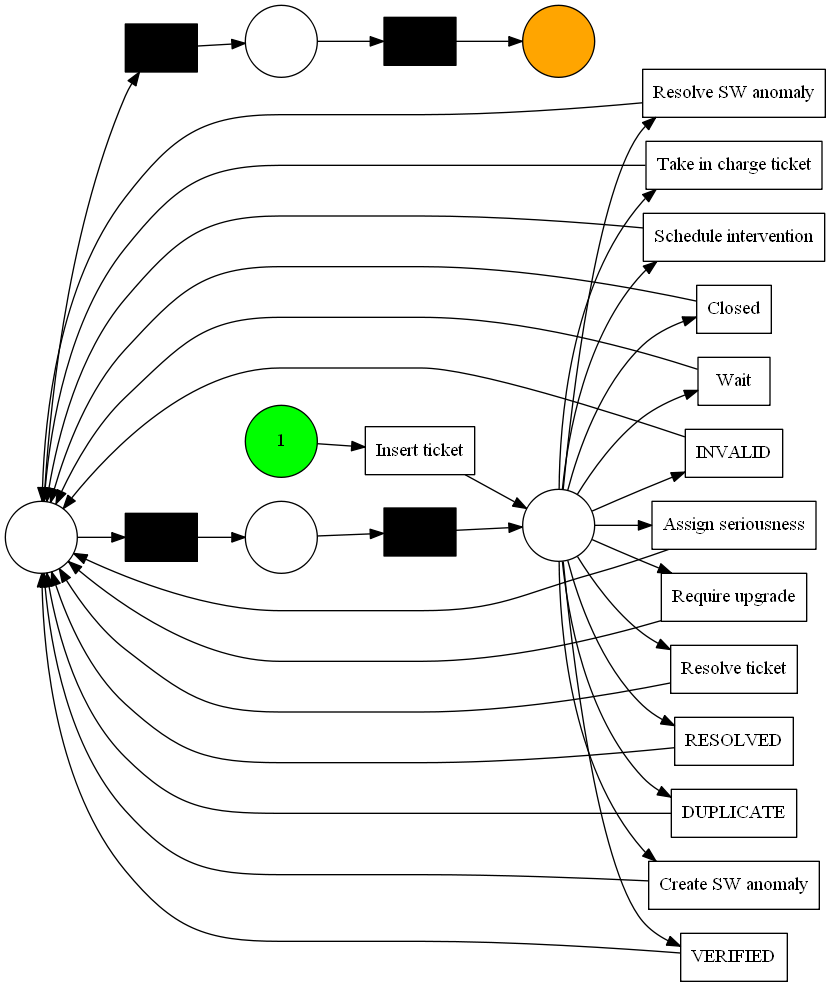

In [64]:
# Your code
new_log_k = log

tree_k = inductive_miner.apply_tree(new_log_k)
net_k, initial_marking_k, final_marking_k = inductive_miner.apply(new_log_k)

gviz_tree_k = pt_vis_factory.apply(tree_k)
pt_vis_factory.view(gviz_tree_k)

gviz_pn_k = pn_vis_factory.apply(net_k, initial_marking_k, final_marking_k)
pn_vis_factory.view(gviz_pn_k)

(l) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit the log?

In [65]:
# Your code
token_replay_result_k = token_based_replay_factory.apply(log, net_k, initial_marking_k, final_marking_k)

count = 0
for item in token_replay_result_k:
    if item['trace_is_fit'] == True:
        count = count + 1
print("True precent is", count/len(token_replay_result_k))

# print(token_replay_result_k)

True precent is 0.02576419213973799


Explanation:

(m) How are these three discovered process models different from each other? Which model is the best fitting to the original log? Why?

Explanation:
all of them don't fit this log, but comparing between these three models the first model is the best fitting to the original log.

(n) Visualize the model discovered in question (k) enriched with frequency information. Subsequently, visualize that same model enriched with performance information.

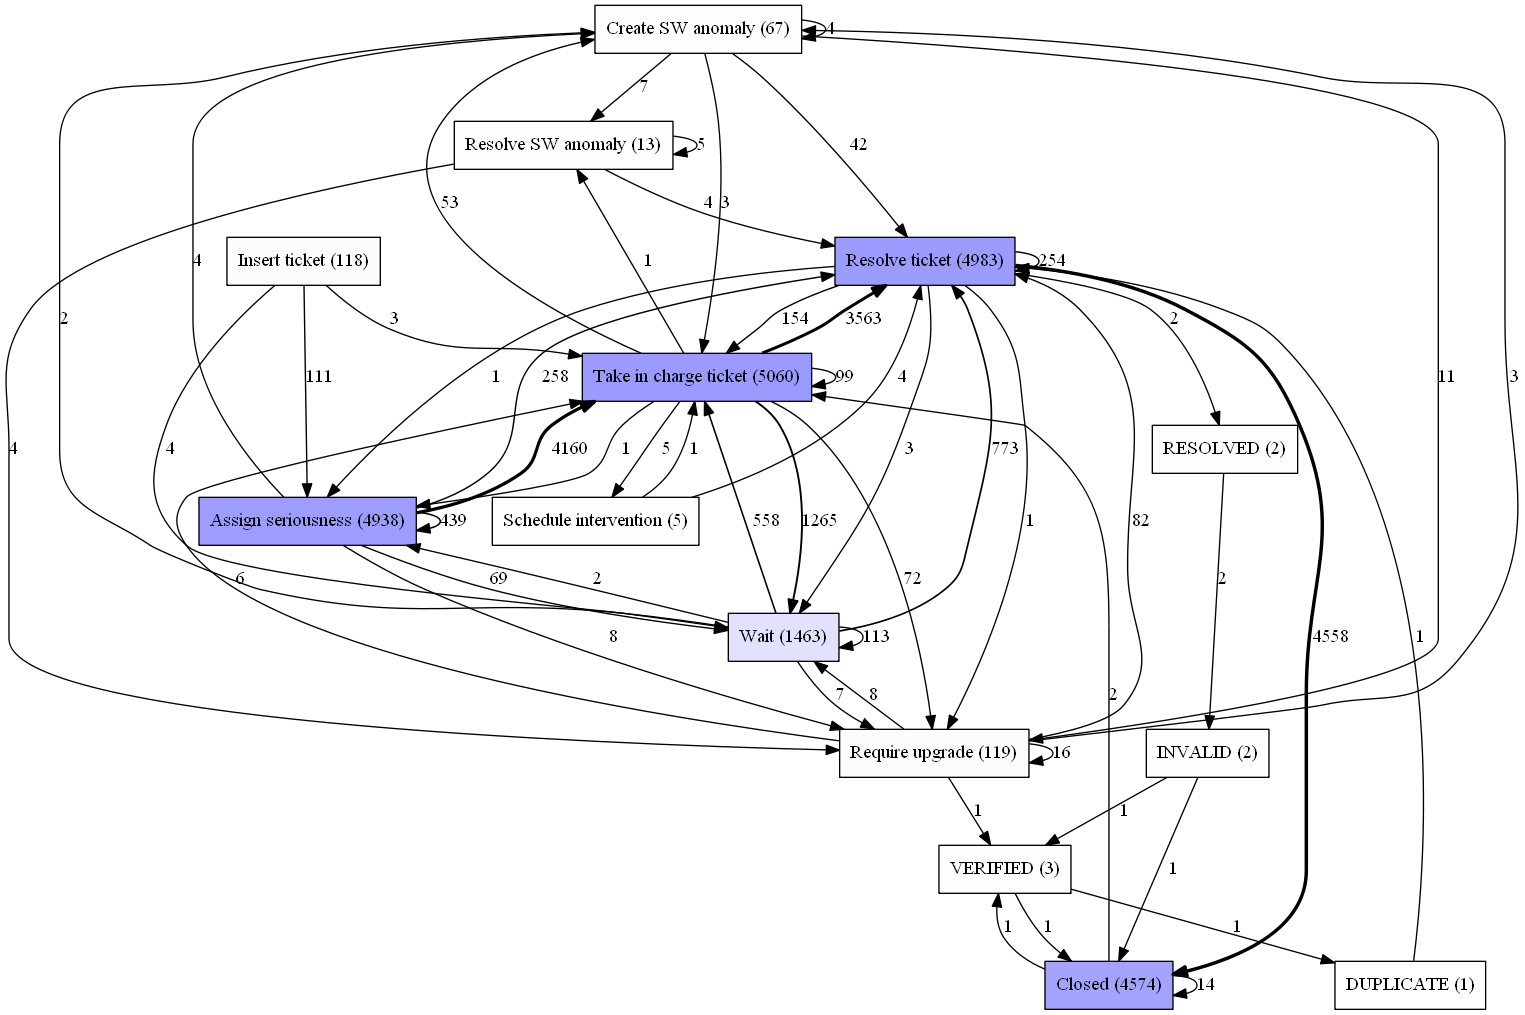

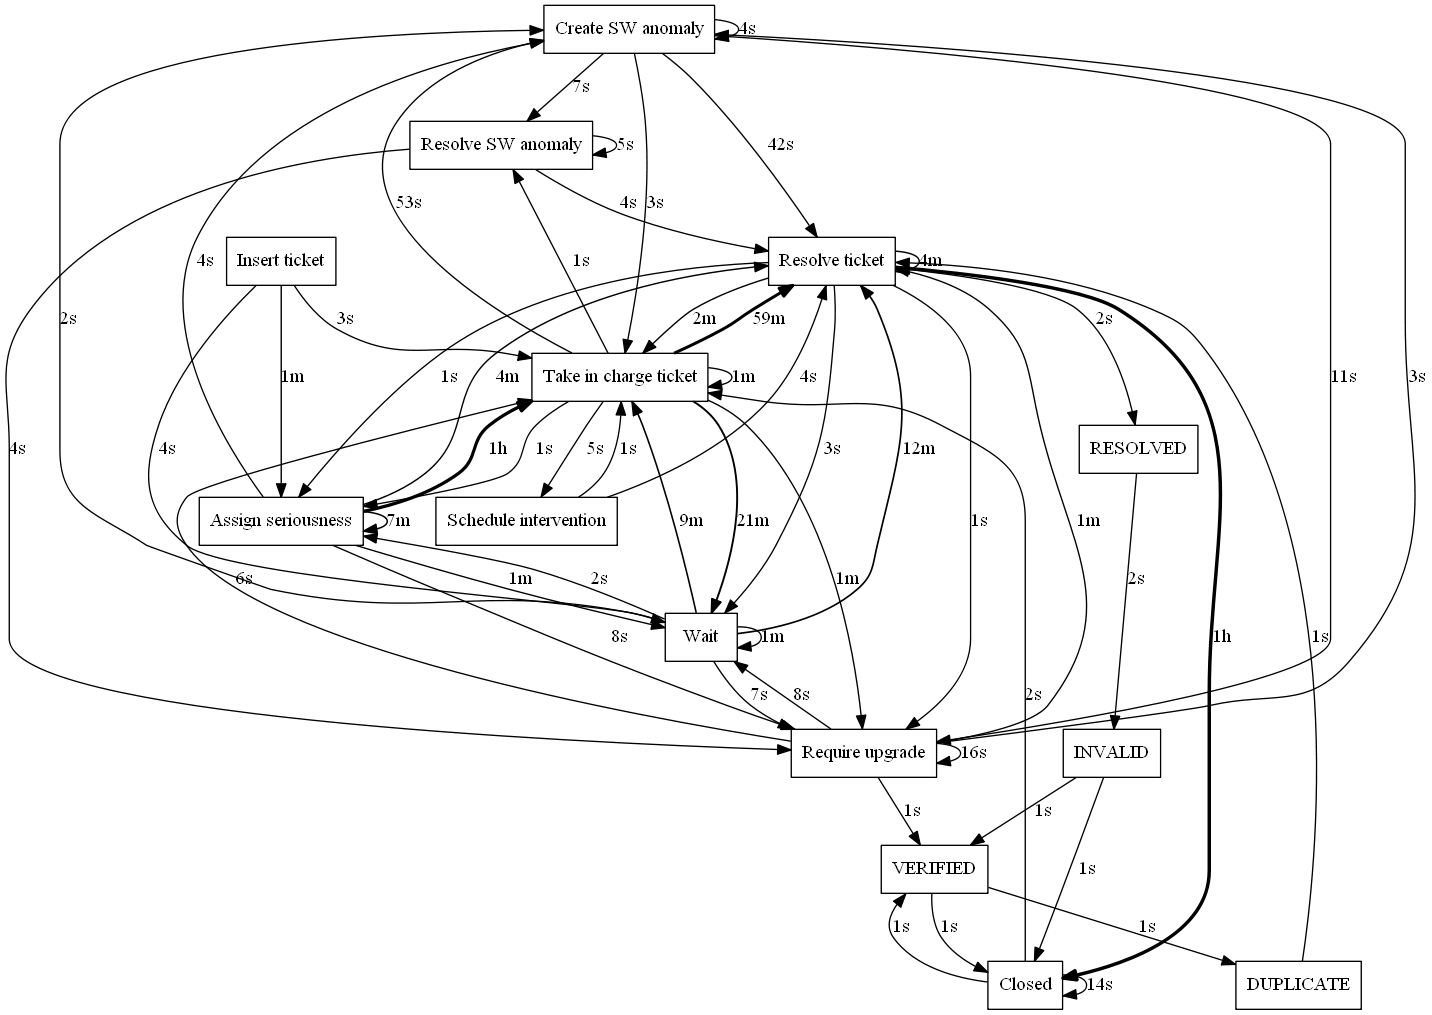

In [66]:
# Your code

from pm4py.algo.discovery.dfg import factory as dfg_factory
from pm4py.visualization.dfg import factory as dfg_vis_factory

dfg = dfg_factory.apply(new_log_k)

gviz_dfg = dfg_vis_factory.apply(dfg, log=new_log_k, variant='frequency')
dfg_vis_factory.view(gviz_dfg)

gviz_dfg = dfg_vis_factory.apply(dfg, log=new_log_k, variant='performance')
dfg_vis_factory.view(gviz_dfg)

(o) If you were the process owner and you had more resources to hire employees, on which parts of the process would you assign them to maximize efficiency?

Explanation:
According to the above graph 'assign seriousness' and 'take charge ticks' and 'Resolve tickets' are most frequest used processes, besides, from them there all exists some pathes that takes a long time, so i suggest to apply employees to these  processes to improve the efficienty.

(p) Add your further comments and considerations on the frequency and performance informations. Does the process have a "happy path", and is it shown in the enhanced process models? Where are the major bottlenecks in this process? Is there any rework?

Explanation:
1.yes.he path start from Assign serious -> take in charge tickets ->resolve tickets-> closed
2.yes. it is shown in both graph with much thicker arrows
3.bottleneck lies also in these processes that connect by these thick arrows because it need to handle so many times it takes long to transfer from one step to another.
4.yes, the selfloop on above digrams is a kind of rework, and the loop from the current one to 
previous visited one also kind of rework, they are everywhere in above two diagrams.